# Question 2.
Build a machine learning model to predict whether a person makes over 50K a
year or not \
[https://drive.google.com/open?id=1XVi34snXnh6qW2u71jwc05oCRnpOXoWF]

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from collections import Counter
import math
%matplotlib inline

In [2]:
# Reading in the data
try:
    df = pd.read_csv("classification_2.csv")
except Exception as e:
    print(f"Error : {e}")

## Data Analysis

Understanding the data before processing and fitting the model

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
39,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
77516,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
13,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
2174,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
0,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
40,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [4]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.nunique()

39                   73
 State-gov            9
 77516            21647
 Bachelors           16
 13                  16
 Never-married        7
 Adm-clerical        15
 Not-in-family        6
 White                5
 Male                 2
 2174               119
 0                   92
 40                  94
 United-States       42
 <=50K                2
dtype: int64

In [6]:
df.isna().any()     # Checking for any missing values in the data

39                False
 State-gov        False
 77516            False
 Bachelors        False
 13               False
 Never-married    False
 Adm-clerical     False
 Not-in-family    False
 White            False
 Male             False
 2174             False
 0                False
 40               False
 United-States    False
 <=50K            False
dtype: bool

In [7]:
df.isnull().sum()   # Checking for any null values in the data

39                0
 State-gov        0
 77516            0
 Bachelors        0
 13               0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 White            0
 Male             0
 2174             0
 0                0
 40               0
 United-States    0
 <=50K            0
dtype: int64

In [8]:
df.dtypes       # Understanding type of values in the data

39                 int64
 State-gov        object
 77516             int64
 Bachelors        object
 13                int64
 Never-married    object
 Adm-clerical     object
 Not-in-family    object
 White            object
 Male             object
 2174              int64
 0                 int64
 40                int64
 United-States    object
 <=50K            object
dtype: object

## Data Preprocessing

In [9]:
df.shape

(32560, 15)

In [10]:
df.sample(10)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
25785,62,State-gov,265201,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K
31264,20,Private,162688,Assoc-voc,11,Never-married,Other-service,Own-child,White,Male,0,0,40,United-States,<=50K
4522,57,Local-gov,148509,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,35,India,<=50K
8578,21,Private,202373,Some-college,10,Never-married,Sales,Own-child,Black,Male,0,0,25,United-States,<=50K
17784,42,Private,403187,HS-grad,9,Divorced,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
20196,30,Private,178841,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K
1597,19,Private,176570,11th,7,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,60,United-States,<=50K
12267,48,State-gov,148306,Masters,14,Divorced,Prof-specialty,Unmarried,White,Female,0,0,40,United-States,<=50K
31301,60,Private,85995,Masters,14,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,0,0,50,South,>50K
9130,51,Self-emp-not-inc,74160,Masters,14,Divorced,Prof-specialty,Unmarried,White,Male,0,0,60,United-States,>50K


In [11]:
df.columns = df.columns.str.strip()     # We are removing/stripping spaces in the column headers

In [12]:
df.rename(columns={'<=50K':'y'}, inplace=True)

In [13]:
df.sample(4)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,y
17360,29,Private,157941,Bachelors,13,Never-married,Tech-support,Not-in-family,White,Male,0,0,40,United-States,<=50K
25978,67,Private,158301,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,0,0,60,United-States,<=50K
19019,29,Private,232666,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
1391,59,Private,226922,HS-grad,9,Divorced,Sales,Unmarried,White,Female,0,1762,30,United-States,<=50K


In [14]:
# sn.swarmplot(df)

Removing the columns which have less effect on the outcome to maximize the accuracy of the model 

In [15]:
df = df.drop(['Never-married', 'Bachelors','Adm-clerical', 'Not-in-family', 'White', 'United-States', 'Male'], axis=1)

In [16]:
df.info

<bound method DataFrame.info of        39          State-gov   77516  13   2174  0  40       y
0      50   Self-emp-not-inc   83311  13      0  0  13   <=50K
1      38            Private  215646   9      0  0  40   <=50K
2      53            Private  234721   7      0  0  40   <=50K
3      28            Private  338409  13      0  0  40   <=50K
4      37            Private  284582  14      0  0  40   <=50K
...    ..                ...     ...  ..    ... ..  ..     ...
32555  27            Private  257302  12      0  0  38   <=50K
32556  40            Private  154374   9      0  0  40    >50K
32557  58            Private  151910   9      0  0  40   <=50K
32558  22            Private  201490   9      0  0  20   <=50K
32559  52       Self-emp-inc  287927   9  15024  0  40    >50K

[32560 rows x 8 columns]>

In [17]:
df.y = df.y.str.strip()

In [18]:
df.head(10)

,39,State-gov,77516,13,2174,0,40,y
0,50,Self-emp-not-inc,83311,13,0,0,13,<=50K
1,38,Private,215646,9,0,0,40,<=50K
2,53,Private,234721,7,0,0,40,<=50K
3,28,Private,338409,13,0,0,40,<=50K
4,37,Private,284582,14,0,0,40,<=50K
5,49,Private,160187,5,0,0,16,<=50K
6,52,Self-emp-not-inc,209642,9,0,0,45,>50K
7,31,Private,45781,14,14084,0,50,>50K
8,42,Private,159449,13,5178,0,40,>50K
9,37,Private,280464,10,0,0,80,>50K


> pandas.get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.

In [19]:
df = pd.concat((df, pd.get_dummies(df['State-gov'])),1)
df = df.drop(['State-gov'],axis=1)

C:\Users\zeesh\AppData\Local\Temp\ipykernel_12504\2775472956.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pd.concat((df, pd.get_dummies(df['State-gov'])),1)


In [20]:
df.head()

,39,77516,13,2174,0,40,y,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,50,83311,13,0,0,13,<=50K,0,0,0,0,0,0,1,0,0
1,38,215646,9,0,0,40,<=50K,0,0,0,0,1,0,0,0,0
2,53,234721,7,0,0,40,<=50K,0,0,0,0,1,0,0,0,0
3,28,338409,13,0,0,40,<=50K,0,0,0,0,1,0,0,0,0
4,37,284582,14,0,0,40,<=50K,0,0,0,0,1,0,0,0,0


In [21]:
df.y = df.y.replace({'<=50K': 0, '>50K': 1})   # Replacing categories with numerical equivalent

In [22]:
df.sample(5)

,39,77516,13,2174,0,40,y,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
4279,30,488720,11,0,0,40,0,0,0,0,0,1,0,0,0,0
31363,61,113080,5,0,0,58,1,0,0,0,0,0,0,1,0,0
8587,40,53506,13,0,0,40,0,0,0,0,0,1,0,0,0,0
1626,52,147876,13,15024,0,60,1,0,0,0,0,1,0,0,0,0
13542,54,159755,10,0,0,40,1,0,0,0,0,1,0,0,0,0


In [23]:
# sn.pairplot(data=df, diag_kind='kde')

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
39,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
77516,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
13,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
2174,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
0,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
40,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0
y,32560.0,0.240817,0.427586,0.0,0.0,0.0,0.0,1.0
?,32560.0,0.056388,0.230673,0.0,0.0,0.0,0.0,1.0
Federal-gov,32560.0,0.029484,0.169161,0.0,0.0,0.0,0.0,1.0
Local-gov,32560.0,0.064281,0.245257,0.0,0.0,0.0,0.0,1.0


<AxesSubplot:>

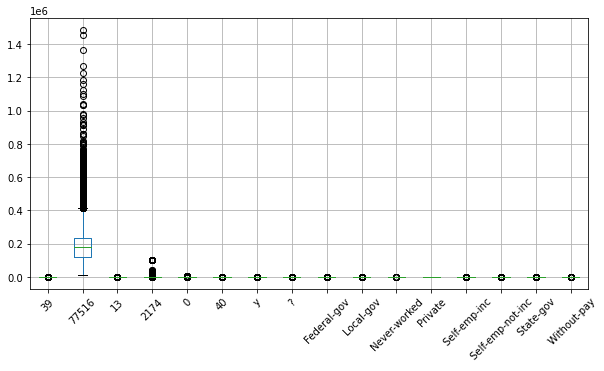

In [25]:
df.boxplot(rot=45, figsize=(10,5))

In [26]:
df.shape

(32560, 16)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   39                 32560 non-null  int64
 1   77516              32560 non-null  int64
 2   13                 32560 non-null  int64
 3   2174               32560 non-null  int64
 4   0                  32560 non-null  int64
 5   40                 32560 non-null  int64
 6   y                  32560 non-null  int64
 7    ?                 32560 non-null  uint8
 8    Federal-gov       32560 non-null  uint8
 9    Local-gov         32560 non-null  uint8
 10   Never-worked      32560 non-null  uint8
 11   Private           32560 non-null  uint8
 12   Self-emp-inc      32560 non-null  uint8
 13   Self-emp-not-inc  32560 non-null  uint8
 14   State-gov         32560 non-null  uint8
 15   Without-pay       32560 non-null  uint8
dtypes: int64(7), uint8(9)
memory usage: 2.0 MB


In [28]:
df.skew()   # Checking for skewness before feature scaling

39                    0.558738
77516                 1.446972
13                   -0.311630
2174                 11.953690
0                     4.594549
40                    0.227636
y                     1.212383
 ?                    3.846469
 Federal-gov          5.563263
 Local-gov            3.553376
 Never-worked        68.182528
 Private             -0.857656
 Self-emp-inc         5.119915
 Self-emp-not-inc     3.146333
 State-gov            4.706125
 Without-pay         48.196771
dtype: float64

In [29]:
from sklearn.model_selection import train_test_split

### Train/Test Split and Feature Scaling

In [30]:
y_values = df['y']  # taking out the y values from the dataset

In [31]:
data = df.drop('y', axis = 1)   # taking out the y values from the dataset

In [32]:
def feature_scaling(dataframe,column):
    """
    
    Args:
        dataframe (_type_): _description_
        column (_type_): _description_

    Returns:
        _type_: _description_
    """
    dataframe[column] = np.divide(np.subtract(dataframe[column],dataframe[column].mean()),
                                  dataframe[column].std())
    return dataframe[column]

In [33]:
column = ['77516','2174','13','39','40','0']
for item in column:
    data[item] = data[item].astype(float)
for item in column:
    data[item] = feature_scaling(data,item)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data, y_values, test_size = 0.2)    # We are splitting the data into training and testing sets in 70:30 ratio

### Sigmoid Function

In [35]:
def sigmoid(x):
    """
    Compute the sigmoid of x
    Arguments:
    x -- A scalar or numpy array of any size
    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

The below function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

In [36]:
# initialize_with_zeros
def initialize_with_zeros(dimension):
    w = np.zeros((dimension,1))
    b = 0
    assert(w.shape == (dimension, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w, b

In [37]:
# X_train, X_test, y_train, y_test
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [38]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    # Forward Propagation (from X to cost)
    A = sigmoid(np.dot(w.T,X)+b)    # compute activation
    cost = -(np.dot(Y,np.log(A.T))+ np.dot(np.log(1-A),(1-Y).T))/m    # compute cost
    # BAckward Propagation (to find gradient)
    dw = np.dot(X,(A-Y).T)/m
    db = np.sum(A-Y)/m
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    grads = {"dw": dw, "db": db}
    return grads, cost

This function optimizes w and b by running a gradient descent algorithm

In [39]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    for i in range(num_iterations):
        # Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        # update rule
        w = w-learning_rate*dw
        b = b-learning_rate*db
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}
    return params, grads, costs

Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

In [40]:
#  Prediction Function
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T,X)+b)
    for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0][i]<=0.5:A[0][i]=0
        else: A[0][i]=1
    Y_prediction=A
    assert(Y_prediction.shape == (1, m))
    return Y_prediction

Builds the logistic regression model by calling the functions we have developed above

In [41]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_cost = False):
    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])
    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    # Predict test/train set examples (￿ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b,X_train)
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    d = {"costs": costs,
    "Y_prediction_test": Y_prediction_test,
    "Y_prediction_train" : Y_prediction_train,
    "w" : w,
    "b" : b,
    "learning_rate" : learning_rate,
    "num_iterations": num_iterations}
    return d

In [42]:
X_train_1 = X_train.T
X_test_1 = X_test.T
y_train_1 = y_train.T
y_test_1 = y_test.T

## Training

In [43]:
# X_train, X_test, y_train, y_test
try:
    d = model(X_train_1, y_train_1, X_test_1, y_test_1, num_iterations = 10000, learning_rate = 0.0001, print_cost = False)
except Exception as e:
    print("The error is :",e)

train accuracy: 79.18074324324324 %
test accuracy: 79.36117936117937 %
